# Linear Regression 

# Import numpy matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Initialize the data points

In [2]:
x_points = [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_points = [1, 2, 3, 1, 4, 5, 6, 4, 7 , 10, 15, 9]
print(x_points)

[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


# Plot the data points

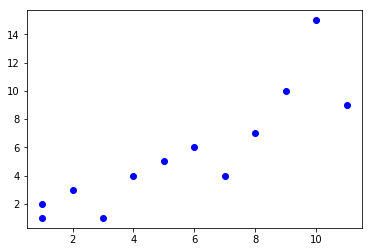

In [3]:
plt.plot(x_points, y_points, 'bo')

# Define a line equation in one variable

In [4]:
# y = mx + b
m = 0

b = 0
y = lambda x : m*x + b

# Plotting a Line in colour Function

In [5]:
def plot_line(y, data_points):
    x_values = [i for i in range(int(min(data_points))-1, int(max(data_points))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

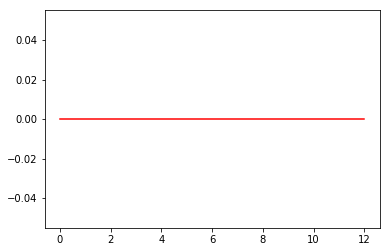

In [64]:
plot_line(y, x_points)

# Initialize Learning Rate

In [12]:
learning_rate = .001  # try for 0.1 , 0.001

# Summation Function

In [13]:
def summation(y, x_points, y_points):
    total1 = 0
    total2 = 0
    
    for i in range(1, len(x_points)):
        total1 += y(x_points[i]) - y_points[i]
        total2 += (y(x_points[i]) - y_points[i]) * x_points[i]
        
    return total1 / len(x_points), total2 / len(x_points)

# Updating the Parameter Gradient Descent 

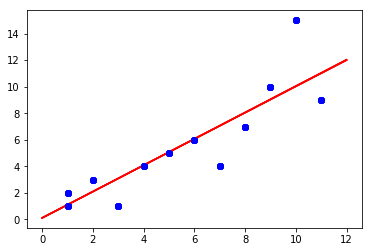

In [20]:
import time

for j in range(30):

    s1, s2 = summation(y, x_points, y_points)
    m = m - learning_rate * s2
    b = b - learning_rate * s1
    #print("AFTER j iteration m = " , m)
    #print("AFTER j iteration b = ", b )
    #time.sleep(.3)
    if (j % 7 == 0):    
        plot_line(y, x_points)
        plt.plot(x_points, y_points, 'bo')
        

In [19]:
# for i in range(5):
#     s1, s2 = summation(y, x_points, y_points)
#     m = m - learn * s2
#     b = b - learn * s1
# print("m = " , m)
# print("b = ", b )
    

In [47]:
# plot_line(y, x_points)
# plt.plot(x_points, y_points, 'bo')

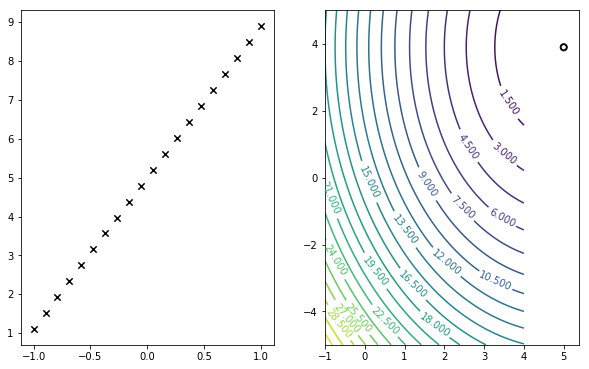

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 5
theta1_true = 3.9
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 23)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()